<a href="https://colab.research.google.com/github/ddas1217/python_class_201/blob/main/MTADelayData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/data/MTADelay.csv')

In [ ]:
df.shape

(40503, 7)

In [ ]:
df.head(20)

,month,division,line,day_type,reporting_category,subcategory,delays
0,2024-12-01,A DIVISION,1,1,Crew Availability,Crew Availability,83
1,2024-12-01,A DIVISION,1,1,External Factors,External Debris on Roadbed,4
2,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Braking,37
3,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,34
4,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",37
5,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Other - CE,22
6,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Other Infrastructure,1
7,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Other Internal Disruptions,11
8,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Other - Sig,424
9,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Propulsion,14


In [ ]:
df.columns

Index(['month', 'division', 'line', 'day_type', 'reporting_category',
       'subcategory', 'delays'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40503 entries, 0 to 40502
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   month               40503 non-null  object
 1   division            40503 non-null  object
 2   line                40503 non-null  object
 3   day_type            40503 non-null  int64 
 4   reporting_category  40503 non-null  object
 5   subcategory         38254 non-null  object
 6   delays              40503 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


In [ ]:
df = df.dropna(subset=["day_type", "reporting_category", "delays", "line"])
# Drop rows with missing values in relevant columns
df["delays"] = pd.to_numeric(df["delays"], errors="coerce")
df = df.dropna(subset=["delays"])
#convert delays into numeric and drop any null values

In [ ]:
df.shape
# looks like nothing was dropped

(40503, 7)

In [ ]:
df.describe()

,day_type,delays
count,40503.000000,40503.000000
mean,1.405575,51.792682
std,0.491009,90.603904
min,1.000000,1.000000
25%,1.000000,5.000000
50%,1.000000,18.000000
75%,2.000000,55.000000
max,2.000000,1220.000000


In [ ]:
df['day_type'] = df['day_type'].map({1: 'Weekday', 2:'Weekend'})
# change day type from number 1 and 2 to weekday and weekend

In [ ]:
#Research Question 1: Which lines have the most delays and what are their top causes?
line_cause = df.groupby(['line', 'reporting_category'])['delays'].sum().reset_index()
#summing up all delays by line and cause. reset index function makes it so the line does not become index

In [ ]:
top_ten = df.groupby('line')['delays'].sum().nlargest(10)
print(top_ten)
# groupby line, sum up delays, pick only top 10 highest sum
top_ten_df = top_ten.reset_index()

line
N    171808
A    164413
F    154176
6    150206
2    137412
E    135499
Q    113824
D    112302
4    109695
1    106071
Name: delays, dtype: int64


In [ ]:
top_ten_lines = df.groupby('line')['delays'].sum().nlargest(10).index
print(top_ten_lines)
#index shows me just line names and not delay totals

Index(['N', 'A', 'F', '6', '2', 'E', 'Q', 'D', '4', '1'], dtype='object', name='line')


In [ ]:
# this filters lin cause df to only include values that are in the top 10 most delayed.
filter_line_cause = line_cause[line_cause['line'].isin(top_ten_lines)]
filter_line_cause

,line,reporting_category,delays
0,1,Crew Availability,16745
1,1,External Factors,2643
2,1,Infrastructure & Equipment,28117
3,1,Operating Conditions,15959
4,1,Planned ROW Work,16336
5,1,Police & Medical,26271
6,2,Crew Availability,14536
7,2,External Factors,3143
8,2,Infrastructure & Equipment,31527
9,2,Operating Conditions,31742


Text(0, 0.5, 'Total Delays')

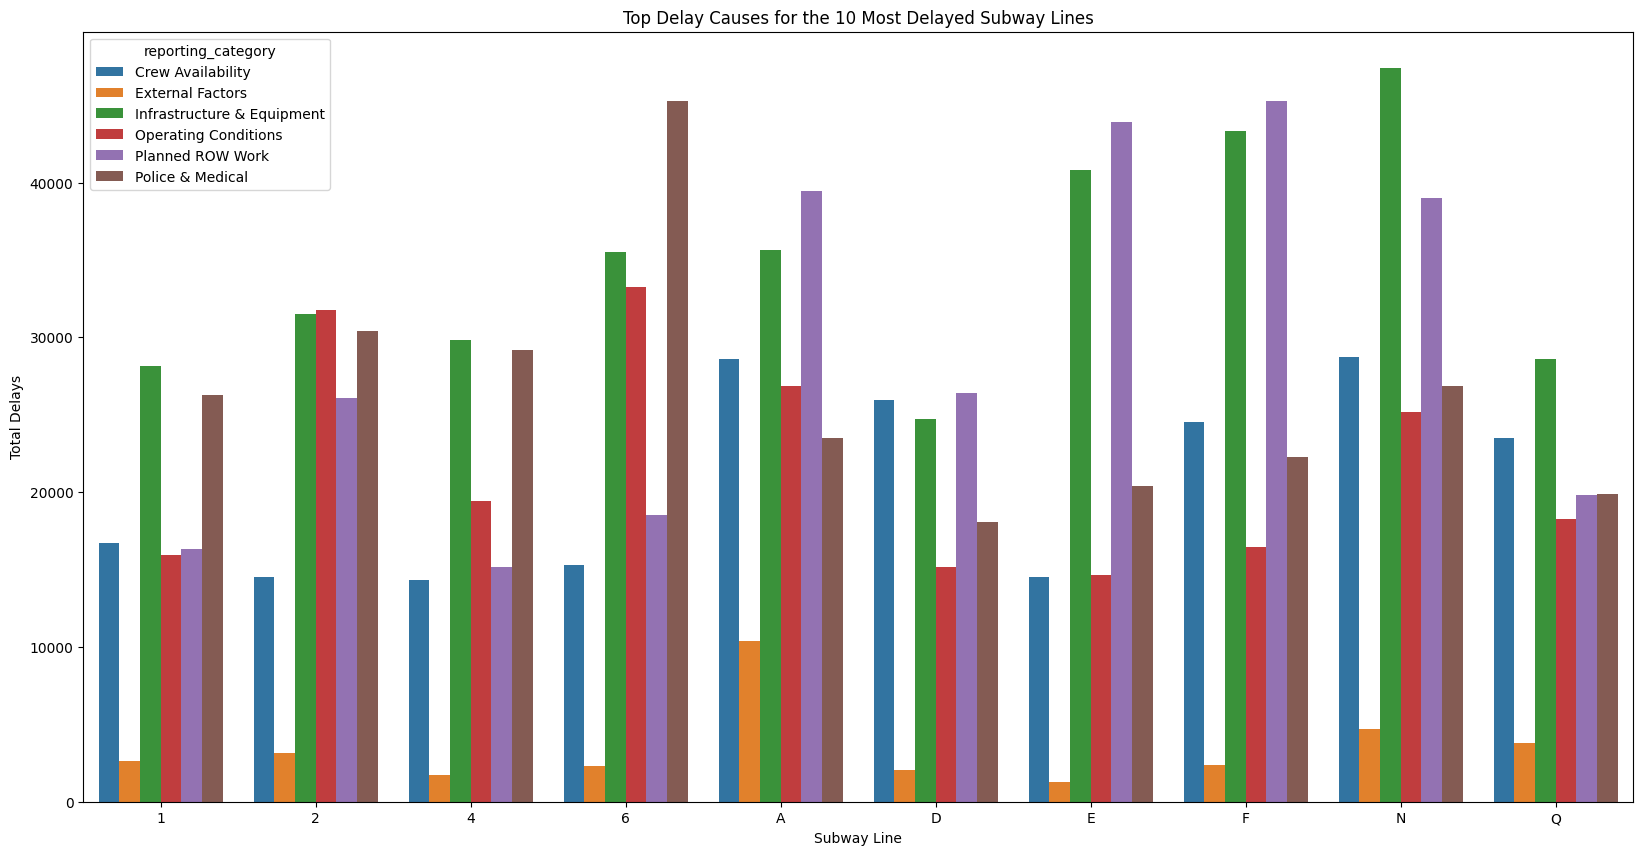

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x= 'line', y = 'delays', data = filter_line_cause, hue='reporting_category')
plt.title('Top Delay Causes for the 10 Most Delayed Subway Lines')
plt.xlabel("Subway Line")
plt.ylabel('Total Delays')

In [ ]:
# Just by looking quickly at this graph we see the green bar being one of the highest bars in each subway line.
# This bar represents infrastructure and equipment which shows that there is a real need to upgrade the equipment and infrastructure.
# But to do this it would require more planned work which is also a leading reason for

<ipython-input-18-c251947bf9b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'line', y = 'delays', data = top_ten_df, palette= palette)


Text(0, 0.5, 'Total Delays')

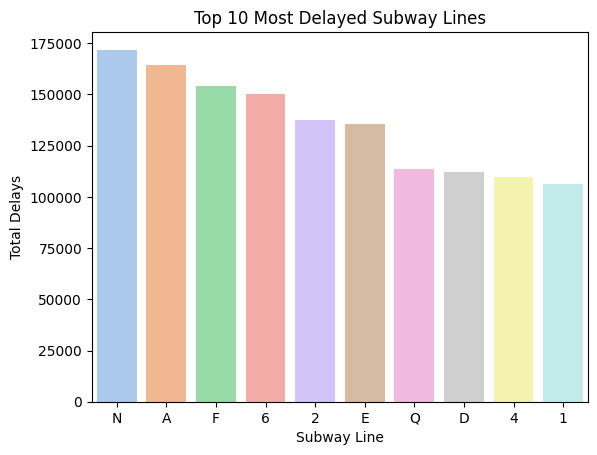

In [ ]:
palette = sns.color_palette('pastel')
sns.barplot(x= 'line', y = 'delays', data = top_ten_df, palette= palette)
plt.title('Top 10 Most Delayed Subway Lines')
plt.xlabel("Subway Line")
plt.ylabel('Total Delays')

In [ ]:
# Just an additional visualization to show which line has the most delays.
# The n line has the most delays.

In [ ]:
total_delays_by_category = df.groupby('reporting_category')['delays'].sum().sort_values(ascending=False)
print(total_delays_by_category)

reporting_category
Infrastructure & Equipment    559581
Police & Medical              410981
Planned ROW Work              408553
Crew Availability             344349
Operating Conditions          316193
External Factors               58102
Name: delays, dtype: int64


<ipython-input-21-b4efc12231cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(x= total_delays_by_category.values, y= total_delays_by_category.index, orient='h', palette=palette1)
<ipython-input-21-b4efc12231cd>:3: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  a=sns.barplot(x= total_delays_by_category.values, y= total_delays_by_category.index, orient='h', palette=palette1)


[Text(0, 0, '58,102')]

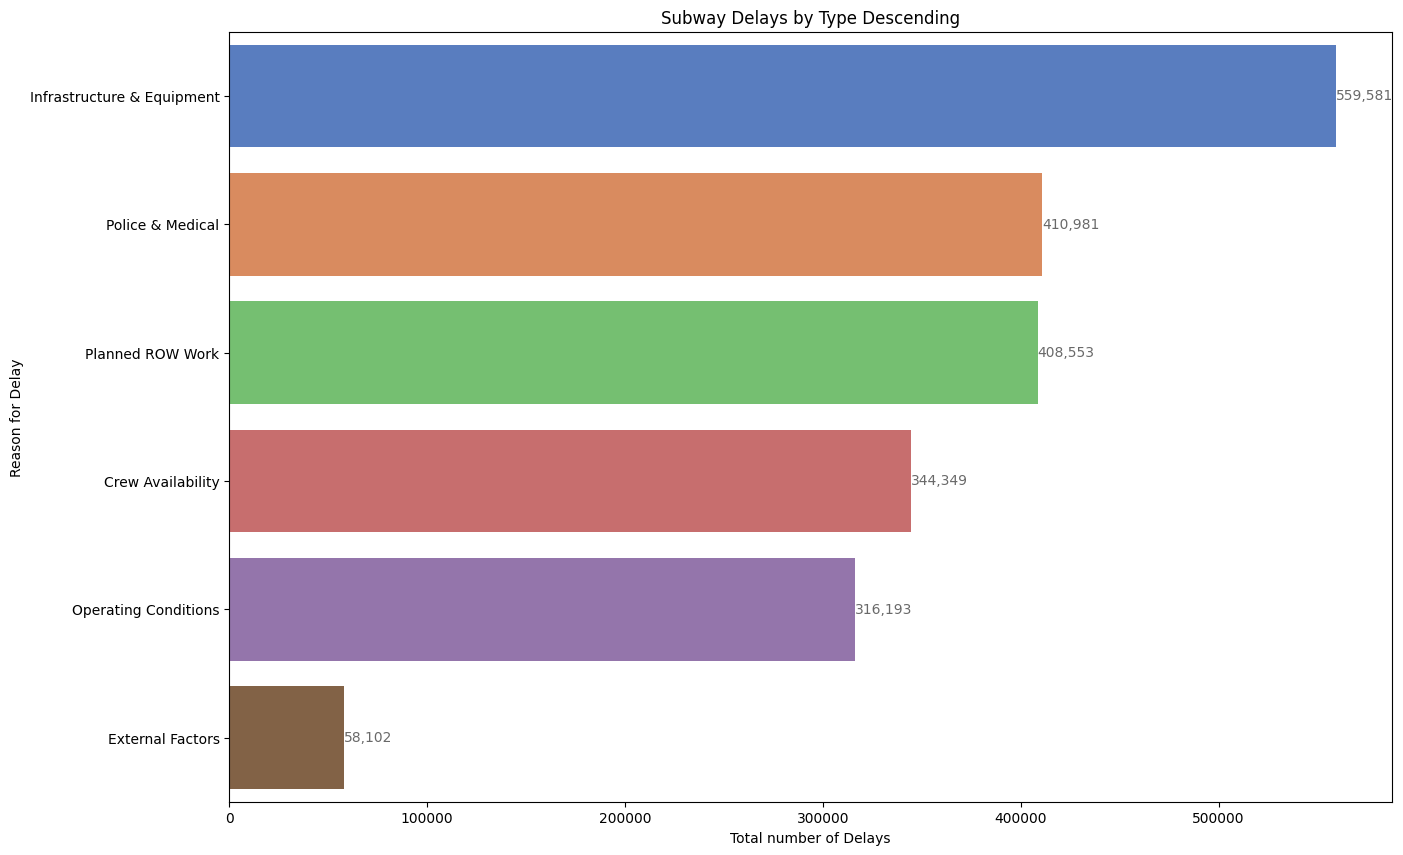

In [ ]:
plt.figure(figsize=(15,10))
palette1 = sns.color_palette('muted')
a=sns.barplot(x= total_delays_by_category.values, y= total_delays_by_category.index, orient='h', palette=palette1)
plt.title('Subway Delays by Type Descending')
plt.xlabel('Total number of Delays')
plt.ylabel('Reason for Delay')
a.bar_label(a.containers[0], color='dimgray', fmt='{:,.0f}')
a.bar_label(a.containers[1], color='dimgray', fmt='{:,.0f}')
a.bar_label(a.containers[2], color='dimgray', fmt='{:,.0f}')
a.bar_label(a.containers[3], color='dimgray', fmt='{:,.0f}')
a.bar_label(a.containers[4], color='dimgray', fmt='{:,.0f}')
a.bar_label(a.containers[5], color='dimgray', fmt='{:,.0f}')

In [ ]:
# This visualization shows that infrastructre and equipment of the MTA is the main reason for delays.
# The MTA needs to fix their infrastucture and get better equipment so that they can become more reliable.
# But as stated before the issue is to fix infrastructure it would ncrease Planned Work which is the third biggest reason for delays.

In [ ]:
#Research Question 2 How do delays differ between weekdays and weekends by cause?

daytype_cause = df.groupby(['day_type', 'reporting_category'])['delays'].sum().reset_index()
#summing up all delays by day type and cause. reset index function makes it so the line does not become index

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Crew Availability'),
  Text(1, 0, 'External Factors'),
  Text(2, 0, 'Infrastructure & Equipment'),
  Text(3, 0, 'Operating Conditions'),
  Text(4, 0, 'Planned ROW Work'),
  Text(5, 0, 'Police & Medical')])

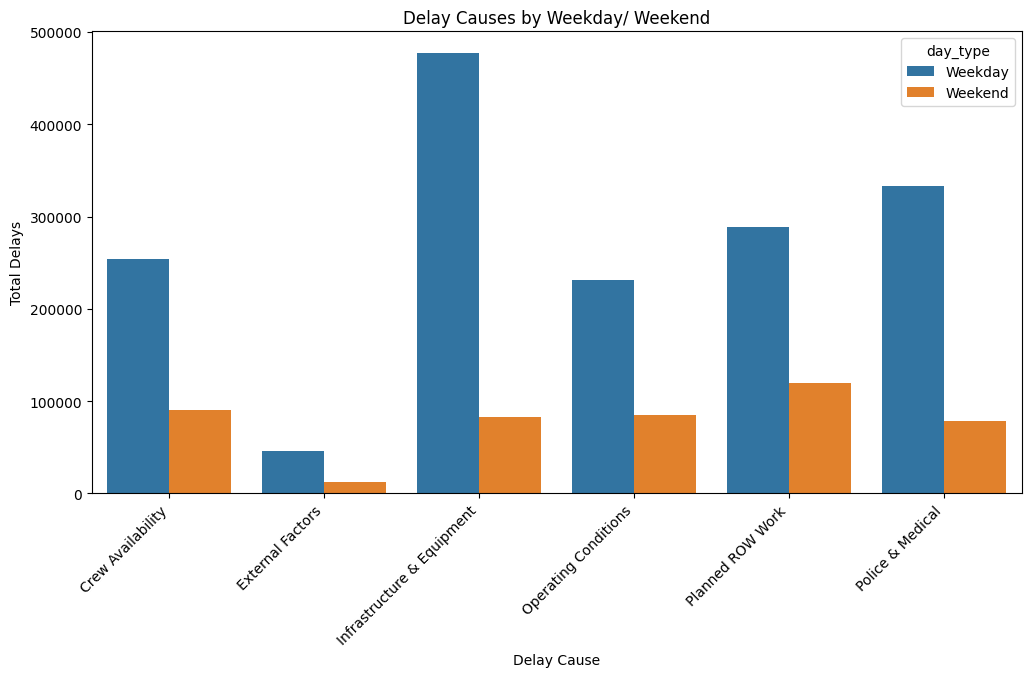

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='reporting_category', y='delays', hue='day_type', data=daytype_cause)
plt.title('Delay Causes by Weekday/ Weekend')
plt.xlabel('Delay Cause')
plt.ylabel('Total Delays')
plt.xticks(rotation=45, ha='right') # rotation rotates x-axis label; ha is horizontal alignment; right aligns the right edge of the label with the tick mark

In [ ]:
# Over the weekend planned work is the reason for the most delays.
# What we could look at is the time of day the work is done and with that we can make sure the MTA has less delays when people use it.